# Instructions for the Assignment

1. Unzip the whole zipped folder and not individual files
2. Don't rename the files. Still, if you wan't to rename them, copy to a new notebook
3. When uploading
        a) put your code in the unrenamed files
        b) copy both the unrenamed files with your code, even if you have done only 1 or done none, to a folder
        c) Rename the folder with your full ID
        d) zip the folder (.zip only) by right-cicking and "Send to"
        e) Upload the zipped file on to the portal
        f) If you get logged out during upload, log back in and check

In [5]:
# Import no other Python module
from functools import partial
import numpy as np
from IPython.core.display import Image

Here, we introduce you to a very basic fuzzy inference system which is a real life application of fuzzy logic and is used in lots of electronic appliances and control systems that we use in our life on a daily basis. __One very common electronic appliance that employs a fuzzy inference system is a washing machine__. There are many popular fuzzy inference systems like __Mamdani fuzzy inference system, Sugeno fuzzy inference system__ etc. which have their own specific uses and applications.

# A Fuzzy Inference System

A fuzzy inference system, in plain terms, is a map between a set of input rules to a set of output rules. Both the input rules and the output rules are fuzzy functions. The primary objective of the fuzzy inference system is to feed a discrete input to the fuzzy input rules, map the fuzzy input rules to the fuzzy output rules and get a discrete output. The fuzzy input and output rules are as shown in the diagram.

In this problem, you will implement a very basic fuzzy inference system with 2 input rules and 2 output rules. __You have to determine the shoe size required by a person given his height and you need this very much to start your own shoe business.__

__Given Discrete Output Domain:__            _Discrete Domain for Shoe Size_     
__Given Input:__              _Discrete Height Value_     
__Given Fuzzy Input Membership Functions:__  _2 fuzzy membership functions for height_     
__Given Fuzzy Output Membership Functions:__ _2 fuzzy membership functions for shoe size_   
__Given Fuzzy Input->Output Rules:__ _Map between input membership functions and output membership functions_  
    
The inference system gives the   
__Output:__             _Discrete Shoe Size Value_  

__ To get an idea of a generic fuzzy inference system, look at the image just below.__  

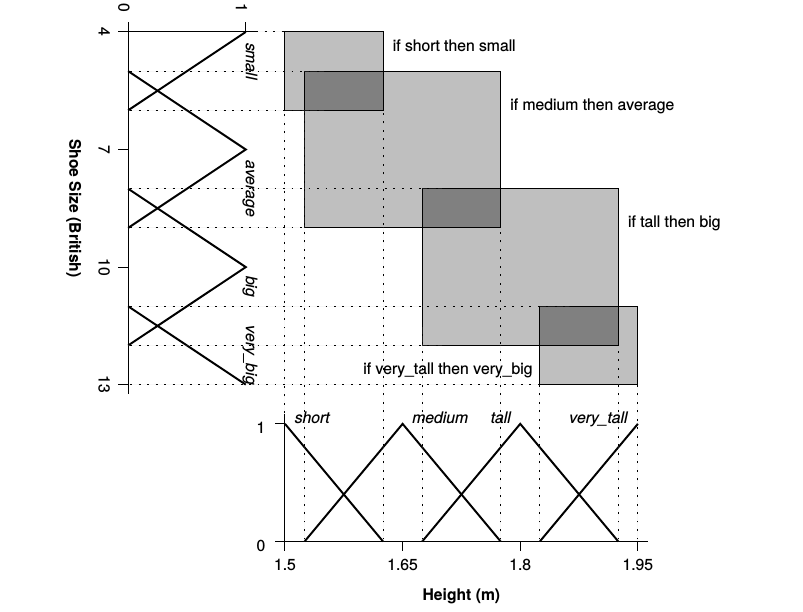

In [6]:
                            """Don't change code in this cell"""
# Image for a general fuzzy inference system
Image(filename=('images/generalFuzzyInference.png'))

In [7]:
                            """Don't change code in this cell"""

""" Discrete domain for shoe size as found in India """

sizes = range(4,13,1) 

In [8]:
                            """Don't change code in this cell"""

""" Membership functions """

# Up membership function
def up(a, b, x):
    a = float(a)
    b = float(b)
    x = float(x)
    if x < a:
        return 0.0
    if x < b:
        return (x - a) / (b - a)
    return 1.0

# Down membership function
def down(a, b, x):
    return 1. - up(a, b, x)

# Triangular membership function
def tri(a, b, x):
    a = float(a)
    b = float(b)
    m = (a + b) / 2.
    first = (x - a) / (m - a)
    second = (b - x) / (b - m)
    return max(min(first, second), 0.)

#Trapezoid Membership Function
def trap(a, b, c, d, x):
    first = (x - a) / (b - a)
    second = (d - x) / (d - c)
    return max(min(first, 1., second), 0.)


In [9]:
                            """Don't change code in this cell"""
""" Fuzzy input rules as fuzzy membership functions of height"""
    
short = partial(down, 1.5, 1.85) # for 'partial', look up docs
tall = partial(up, 1.6, 1.95)    # for 'partial', look up docs


In [10]:
                            """Don't change code in this cell"""
""" Fuzzy ouput rules as fuzzy membership functions of shoe size"""

def small(size):
    return down(4., 10., size)
def big(size):
	return up(7., 13., size)

In [11]:
                            """Don't change code in this cell"""
""" Input -> Output Rules """
""" To see how the input rules are mapped to the output rules, see the image below """ 
rules = [ (short, small), (tall, big) ]


# Getting the ouput membership function from the input and output rules

Suppose, the $input\ height\ value$ is such that it belongs to $both\ input\ membership\ functions\ (short\ and\ tall)$. Let the $membership\ value$ of $short$ is $A$ and the $membership\ value$ of $tall$ is $B$. Now, since the $short\ input\ rule$ gives the $small\ output\ rule$, the $output\ membership\ rule\ small$ gets $scaled$ by $A$. Since, the $tall\ input\ rule$ gives the $big\ output\ rule$, the $output\ membership\ rule\ big$ gets $scaled$ by $B$. Now, the $final\ output\ membership\ function$ becomes $A*OutputRule1 + B*OutputRule2$. Now, defuzzify this using the $centroid\ method$ to get the discrete output.    
   
__Input Height Value:__ _'x'_  
__Input Membership Function 1:__ _f_  
__Input Membership Function 2:__ _g_  
__Memberhsip Value of 'x' in f:__ _f('x') = A_  
__Memberhsip Value of 'x' in g:__ _f('b') = B_  
__Output Membership Function 1:__ _o_  
__Output Membership Function 2:__ _m_  
__Fuzzy Output Function for getting discrete output:__ _minimum of 1 and A\*o(y) + B\*m(y) for all y in output domain_  
__Discrete Ouput Value:__ _Defuzzified Value according to the Centroid Method_   
     
    
                        See Diagram to understand better!!

In [ ]:
                """ Very important diagram, see this carefully!!!"""
                """Don't change code in this cell"""
# Image for a 2x2 fuzzy inference system
Image(filename=('images/2x2.png'))

In [12]:
                            """Don't change code in this cell"""
""" Taking product of an input membership value and corresponding ouput memberhsip function"""
def updated_func(val, func, size):
    first = func(size)
    return (val * first)

# Question Part 1: To be implemented by the student

In [13]:
                """Change code in this cell only between the comments 'Your code here' and 'Your code ends'"""
#Input: Takes discrete height
#Output: Returns output membership function in variable 'rulebase_function', use lambda (look up docs)
def rulebase(height):
    updated = []
    for input_func, output_func in rules: 
        val = input_func(height) 
        updated.append(partial(updated_func, val, output_func)) #for 'partial', look up docs
    # Use 'lambda' to create the output function (variable name -> rulebase_function), look up the docs
    # YOUR CODE HERE
    raise NotImplementedError()
    return rulebase_function

# Test Cases for Output Membership Function for Producing Discrete Shoe Size

In [14]:
                            """Don't change code in this cell"""
# Visible Test Case
visible1_input_height=1.6
visbile1_test_height=1.7
visible1_output_test_height_func=rulebase(visible1_input_height)
visible1_predicted_output_test_height_val=visible1_output_test_height_func(visbile1_test_height)
visible1_actual_output_test_height_val = 0.7142857142857141
assert np.allclose(visible1_predicted_output_test_height_val,visible1_actual_output_test_height_val, 
                   rtol=1e-05, atol=1e-06)

NotImplementedError: 

In [ ]:
                            """Don't change code in this cell"""
# Hidden Test Case 1

In [ ]:
                            """Don't change code in this cell"""
# Hidden Test Case 2

# Defuzzification Using Centroid Method as Given in Practice Problems

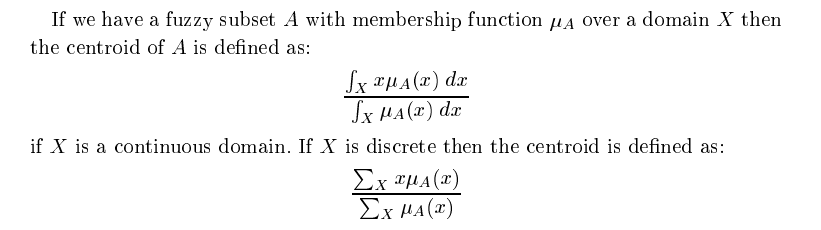

In [15]:
                            """Don't change code in this cell"""
# Image for the centroid defuzzification method
Image(filename=('images/defuzzification2.png'))

# Question Part 2: To be implemented by the student

In [ ]:
                """Change code in this cell only between the comments 'Your code here' and 'Your code ends'"""
#Input: domain and membership function
#Output: Returns discrete value according to the centroid meter
def centroid(domain, membership_function):
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return cent

# Test Cases for Centroid Defuzzification

In [ ]:
                                """Don't change code in this cell"""
# Visible Test Case
visible1_domain = [float(i) for i in range(0,10)] 
visible1_membership_function = partial(trap, 2, 3, 6, 9)
visible1_predictedDiscrete=centroid(visible1_domain, visible1_membership_function)
visible1_actualDiscrete = 5.066666666666666
assert np.allclose(visible1_predictedDiscrete,visible1_actualDiscrete, rtol=1e-05, atol=1e-06)

In [ ]:
                                """Don't change code in this cell"""
# Hidden Test Case 1

In [ ]:
                                """Don't change code in this cell"""
# Hidden Test Case 2

# Test Cases for the Whole System

In [ ]:
                            """Don't change code in this cell"""
# Visible Test Case
visible1_height=1.7
visible1_predictedSize = centroid(sizes, rulebase(visible1_height))
visible1_actualSize = 7.279569892473115
assert np.allclose(visible1_predictedSize,visible1_actualSize, rtol=1e-05, atol=1e-06)

In [ ]:
                            """Don't change code in this cell"""
# Hidden Test Case 1

In [ ]:
                            """Don't change code in this cell"""
# Hidden Test Case 2